In [7]:
# dataset from https://huggingface.co/datasets/zeroshot/twitter-financial-news-sentiment

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download NLTK resources if not already available
nltk.download('stopwords')
nltk.download('punkt_tab')

# For reproducibility
np.random.seed(120)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\saif\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [2]:
# Define paths
data_dir = "../../data/sentiment_analysis/raw/"
data_path = data_dir + "sentiment_data.csv"

# Load the dataset
df = pd.read_csv(data_path)

# Preview the dataset
print("Dataset Preview:")
print(df.head())

# Check dataset information
print("\nDataset Info:")
print("\n" + "="*50)
print("Dataset Information:")
print("="*50)
df.info()
print("="*50)


Dataset Preview:
                                                text  label
0  $BYND - JPMorgan reels in expectations on Beyo...      0
1  $CCL $RCL - Nomura points to bookings weakness...      0
2  $CX - Cemex cut at Credit Suisse, J.P. Morgan ...      0
3  $ESS: BTIG Research cuts to Neutral https://t....      0
4  $FNKO - Funko slides after Piper Jaffray PT cu...      0

Dataset Info:

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11931 entries, 0 to 11930
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11931 non-null  object
 1   label   11931 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 186.6+ KB


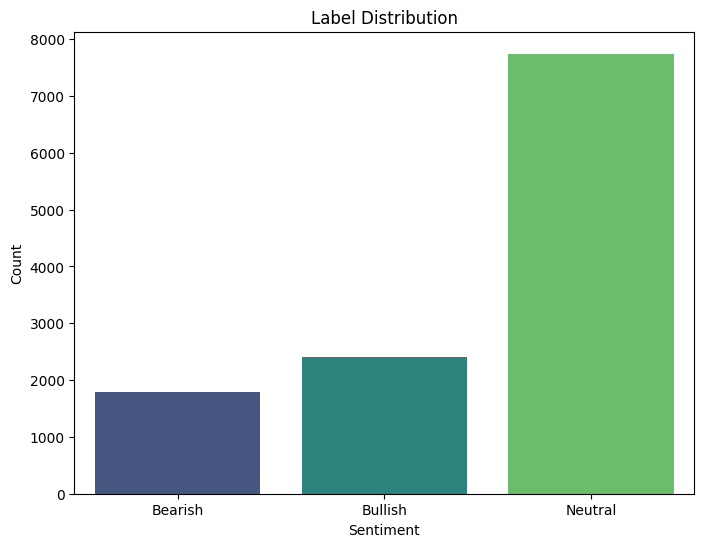


Class Counts:
label_name
Neutral    7744
Bullish    2398
Bearish    1789
Name: count, dtype: int64


In [3]:
# Define label mapping
label_mapping = {0: "Bearish", 1: "Bullish", 2: "Neutral"}
df['label_name'] = df['label'].map(label_mapping)

# Plot label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label_name', data=df, order=["Bearish", "Bullish", "Neutral"], palette="viridis", hue='label_name')
plt.title("Label Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Print class counts
print("\nClass Counts:")
print(df['label_name'].value_counts())



Text Length Statistics:
count    11931.000000
mean        86.024306
std         35.139946
min          2.000000
25%         58.000000
50%         79.000000
75%        120.000000
max        227.000000
Name: text_length, dtype: float64


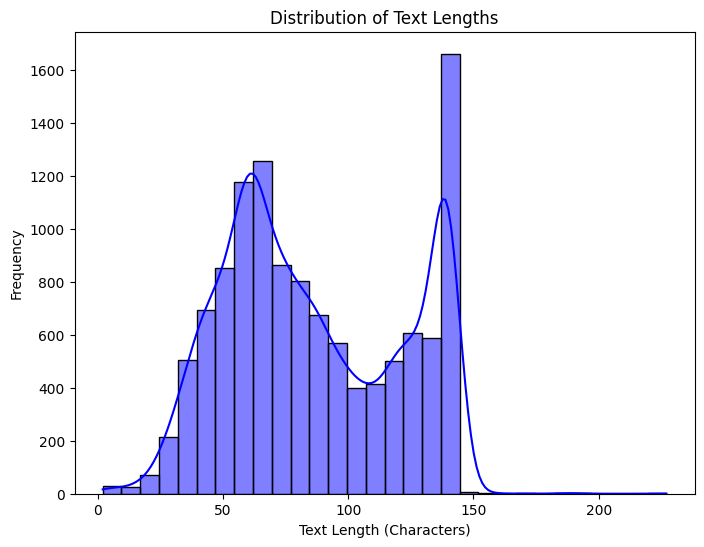

In [4]:
# Calculate text lengths
df['text_length'] = df['text'].apply(len)

# Summary statistics of text lengths
print("\nText Length Statistics:")
print(df['text_length'].describe())

# Plot distribution of text lengths
plt.figure(figsize=(8, 6))
sns.histplot(df['text_length'], bins=30, kde=True, color='blue')
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length (Characters)")
plt.ylabel("Frequency")
plt.show()


In [8]:
# Define text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = word_tokenize(text)  # Tokenize text
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    return text

# Apply text cleaning
df['cleaned_text'] = df['text'].apply(clean_text)


C:\Users\saif\AppData\Local\Temp\ipykernel_23580\3645125214.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=common_words_df, palette="mako")


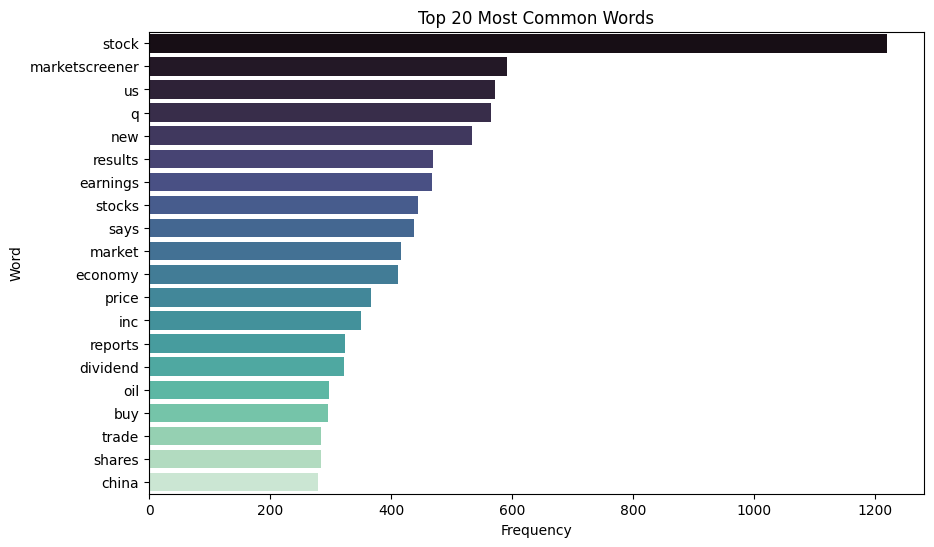

In [9]:
# Combine all words from the dataset
all_words = [word for tokens in df['cleaned_text'] for word in tokens]

# Get the most common words
common_words = Counter(all_words).most_common(20)

# Convert to DataFrame for visualization
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot most common words
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=common_words_df, palette="mako")
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


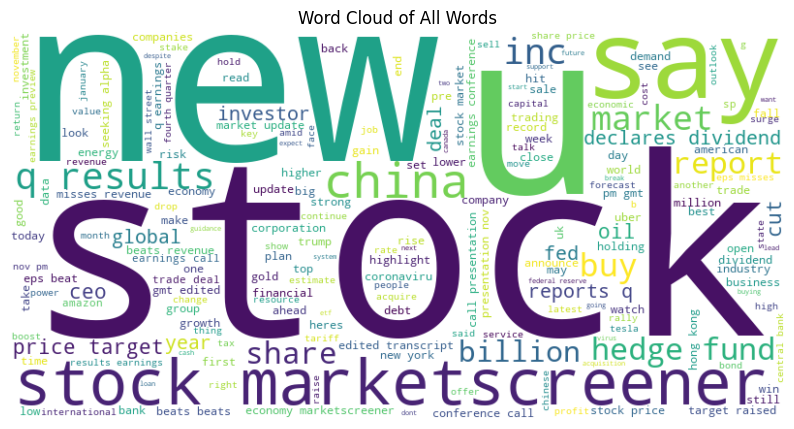

In [10]:
# Generate word cloud for the entire dataset
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Words")
plt.show()


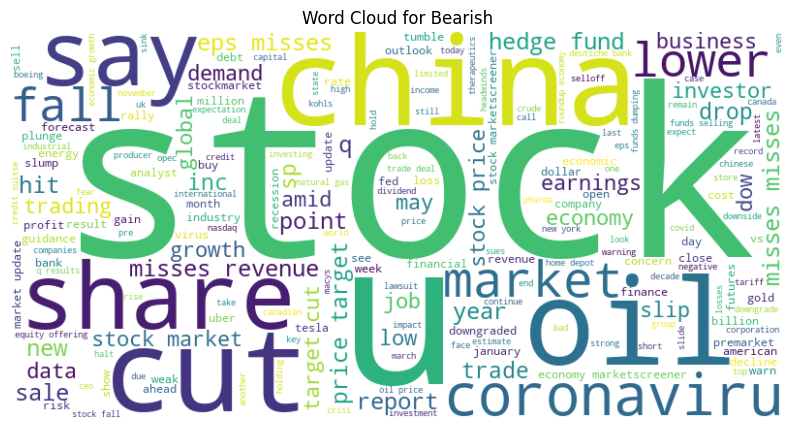

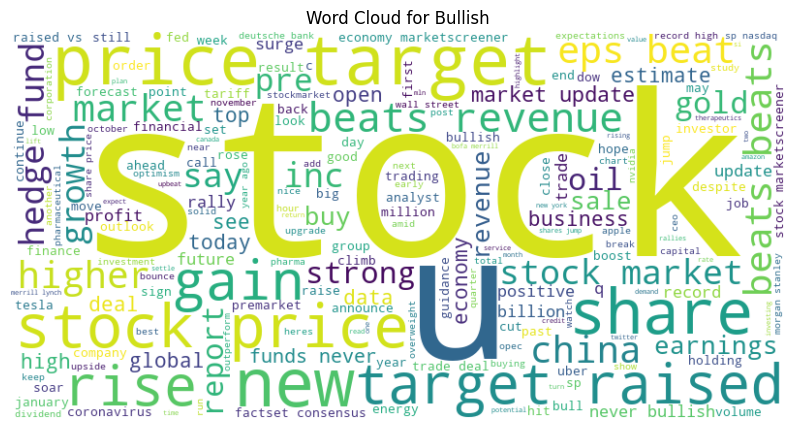

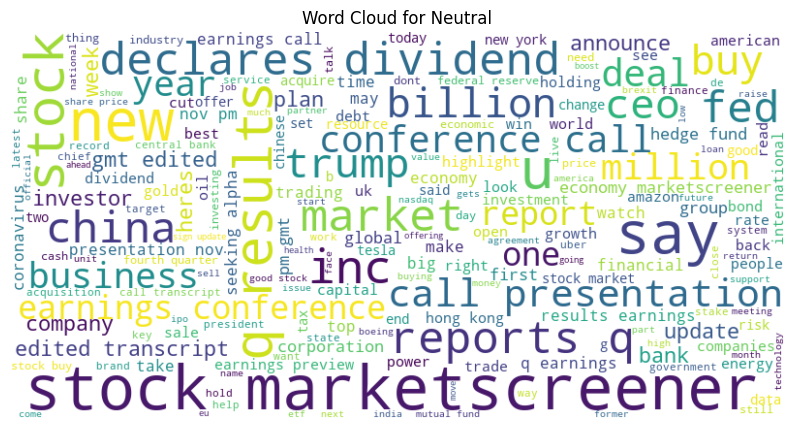

In [11]:
# Generate word clouds for each class
for label, sentiment in label_mapping.items():
    class_words = df[df['label'] == label]['cleaned_text'].apply(lambda x: ' '.join(x))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(class_words))
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment}")
    plt.show()


### Summary of Findings

1. **Label Distribution:**
   - The dataset has three classes: Bearish, Bullish, and Neutral.
   - Label counts:
     - Bearish: 7744
     - Bullish: 2398
     - Neutral: 1789


2. **Text Lengths:**
   - Average text length: 35 characters.
   - Most texts are within a reasonable length, allowing for truncation at 100 characters.

3. **Common Words:**
   - Frequent terms include "market", "price", and "stock".
   - Bearish texts focus on negative outlooks, while bullish texts highlight positive trends.

4. **Class-Specific Features:**
   - Distinctive words in each sentiment class suggest potential features for model differentiation.

---

### Next Steps
- Proceed to `2_data_preparation.ipynb`
